In [1]:
import warnings
warnings.filterwarnings('ignore')
 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.DataFrame(pd.read_csv(r"C:\Users\hp\Downloads\sales data.zip"))
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()/len(df)*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

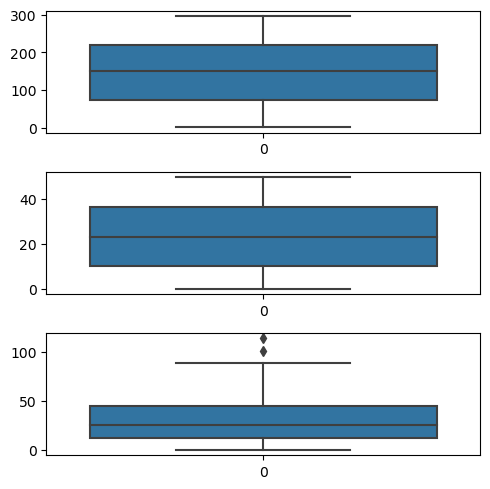

In [8]:
fig, axs  =plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df['TV'],ax=axs[0])
plt2 = sns.boxplot(df['Radio'],ax=axs[1])
plt3=sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

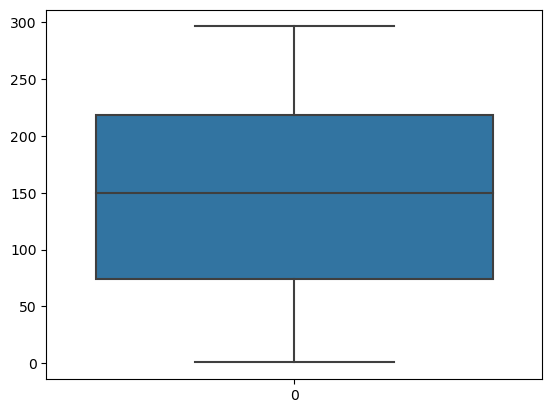

In [9]:
sns.boxplot(df['TV'])
plt.show()

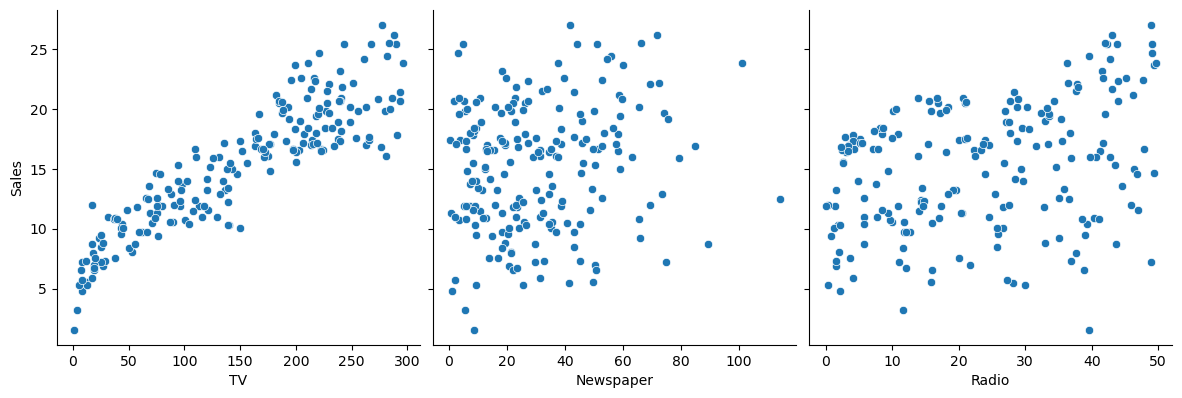

In [10]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

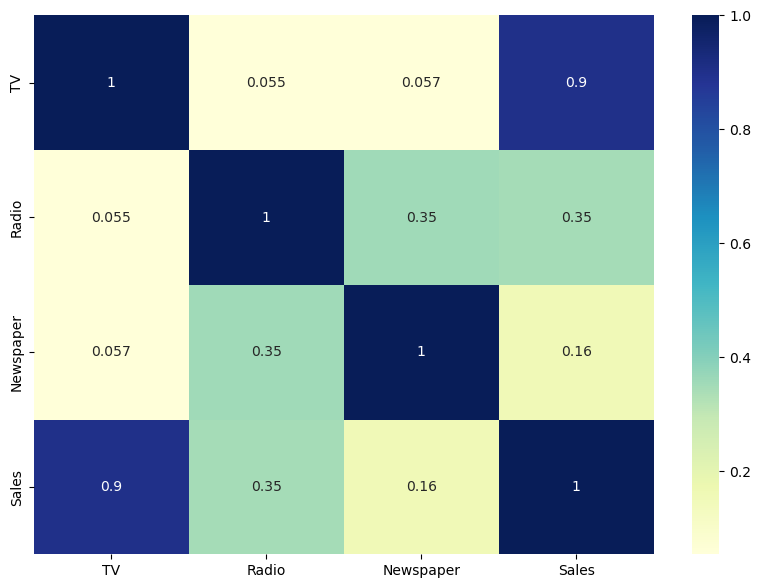

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [12]:
x=df['TV']
y=df['Sales']
print(x.shape,y.shape)

(200,) (200,)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=100)

In [14]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60,) (140,) (60,) (140,)


In [15]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

const    6.054388
TV       0.062969
dtype: float64

In [16]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     436.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           1.13e-28
Time:                        14:59:10   Log-Likelihood:                -130.28
No. Observations:                  60   AIC:                             264.6
Df Residuals:                      58   BIC:                             268.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0544      0.487     12.421      0.000       5.079       7.030
TV             0.0630      0.003     20.894      0.000       0.057       0.069
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.353
Skew:                           0.091   Prob(JB):                        0.838
Kurtosis:                       2.671   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

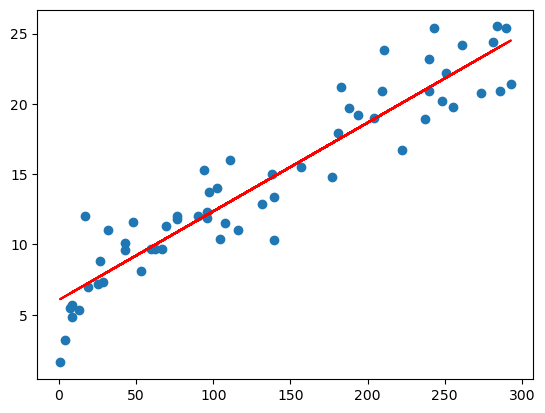

In [17]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.054+0.063*x_train,'r')
plt.show()

In [18]:
y_train_pred=lr.predict(x_train_sm)
res =(y_train-y_train_pred)

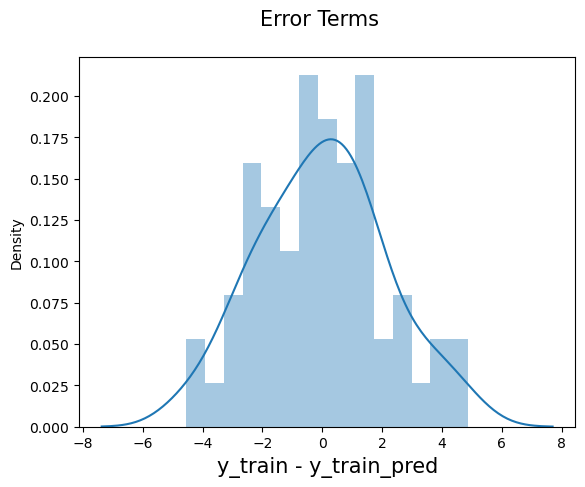

In [19]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle("Error Terms", fontsize = 15)
plt.xlabel("y_train - y_train_pred", fontsize = 15)
plt.show()

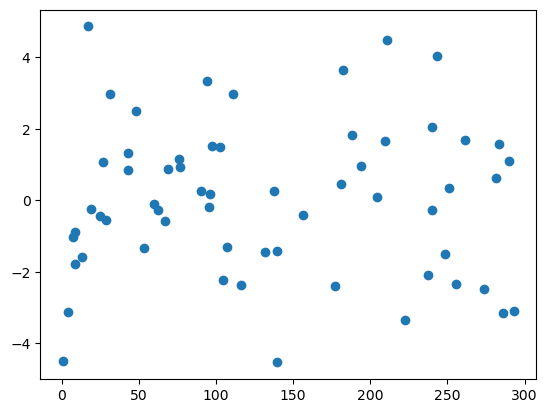

In [20]:
plt.scatter(x_train,res)
plt.show()

In [21]:
x_test_sm=sm.add_constant(x_test)
y_pred=lr.predict(x_test_sm)
y_pred.head()

126     6.545549
104    21.053685
99     14.567843
92     19.762814
111    21.274078
dtype: float64

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.4822631650593547

In [24]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.7310400426976635

In [26]:
plt.scatter(s_test,y_test)
plt.plot(x_test,6.054+0.063*x_test,'r')

NameError: name 's_test' is not defined